[![View notebook](https://img.shields.io/static/v1?label=render%20on&logo=github&color=87ce3e&message=GitHub)](https://github.com/open-atmos/PySDM/blob/main/examples/PySDM_examples/Gedzelman_and_Arnold_1994/fig_2.ipynb)
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/open-atmos/PySDM.git/main?urlpath=lab/tree/examples/PySDM_examples/Gedzelman_and_Arnold_1994/fig_2.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/open-atmos/PySDM/blob/main/examples/PySDM_examples/Gedzelman_and_Arnold_1994/fig_2.ipynb)

#### based on Fig. 2 from Gedzelman and Arnold 1994 (JGR)  "_Gedzelman, S. D., & Arnold, R. (1994). Modeling the isotopic composition of precipitation_"
https://doi.org/10.1029/93JD03518

In [1]:
import sys
if 'google.colab' in sys.modules:
    !pip --quiet install open-atmos-jupyter-utils
    from open_atmos_jupyter_utils import pip_install_on_colab
    pip_install_on_colab('PySDM')

In [2]:
from open_atmos_jupyter_utils import show_plot
from PySDM import Formulae
from PySDM.physics.constants import si, PER_MILLE, T0
from matplotlib import pyplot
import numpy as np

In [3]:
class no_fractionation_saturation:
    def __init__(self, *, delta_v, temperature, liquid = False, vapour = False):
        assert liquid or vapour
        self.liquid = liquid

        formulae = Formulae(isotope_equilibrium_fractionation_factors='MerlivatAndNief1967')
        const = formulae.constants

        self.iso_ratio_v = formulae.trivia.isotopic_delta_2_ratio(delta_v, const.VSMOW_R_2H)
        self.b = formulae.latent_heat.lv(temperature)**2 * const.D0 / const.K0 / const.Rv / temperature**2
        self.diff_coef_ratio = 1.0251  # TODO #1307 - ventillation coeff!
        self.alpha_w = formulae.isotope_equilibrium_fractionation_factors.alpha_l_2H(temperature)

    def __call__(self, iso_ratio_r):
        iso_ratio_x = iso_ratio_r if self.liquid else self.iso_ratio_v
        return (
            self.diff_coef_ratio * iso_ratio_x 
            - iso_ratio_r / self.alpha_w
        ) / (
            self.diff_coef_ratio * iso_ratio_x 
            - (1 + self.b) * self.iso_ratio_v
            + self.b * iso_ratio_r / self.alpha_w
        )

In [4]:
ambient_air = {
    'delta_v': -200 * PER_MILLE,
    'temperature': T0 + 10 * si.K
}
eq_22 = no_fractionation_saturation(liquid=True, **ambient_air)
eq_23 = no_fractionation_saturation(vapour=True, **ambient_air)

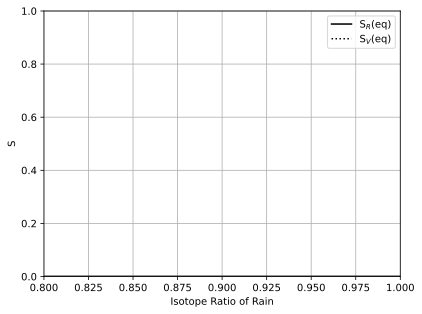

HTML(value="<a href='./fig_2.pdf' target='_blank'>./fig_2.pdf</a><br>")

In [5]:
x = np.linspace(.8, 1)
pyplot.plot(x, eq_22(x), label='S$_R$(eq)', color='k')
pyplot.plot(x, eq_23(x), label='S$_V$(eq)', color='k', linestyle=':')
pyplot.grid()
pyplot.legend()
pyplot.xlim(.8, 1)
pyplot.xlabel('Isotope Ratio of Rain')
pyplot.ylim(0, 1)
pyplot.ylabel('S')
show_plot('fig_2.pdf')

In [ ]:
# TODO #1307 - make the above plot correct
# TODO #1307 - smoke test
# TODO #1307 - move consants and formulae into physics 